In [1]:
# Import Libraries #
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt  # matplotlib for plotting
import seaborn as sns  # seaborn to help with visualizations

In [2]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Open UFO data
ufo_df = pd.read_csv('/content/drive/MyDrive/Procoders_7,8/PC_Session-52/Resource/UFO_Sightings_Dataset.csv',
                  low_memory=False,
                  na_values = ['UNKNOWN','UNK'], 
                  na_filter = True, 
                  skip_blank_lines = True)

In [4]:
# Choose columns to work with based on our initial questions
ufo_subcols = ['datetime', 'city', 'state', 'country', 'shape', 'duration (seconds)',
               'comments', 'date posted', 'latitude', 'longitude']

ufo_df = pd.DataFrame(data=ufo_df, columns=ufo_subcols)

In [5]:
ufo_df.shape

(79973, 10)

In [6]:
ufo_df.head()

datetime                  city  ...   latitude   longitude
0  10/10/1949 20:30            san marcos  ...  29.883056  -97.941111
1  10/10/1949 21:00          lackland afb  ...  29.384210  -98.581082
2  10/10/1955 17:00  chester (uk/england)  ...  53.200000   -2.916667
3  10/10/1956 21:00                  edna  ...  28.978333  -96.645833
4  10/10/1960 20:00               kaneohe  ...  21.418056 -157.803611

[5 rows x 10 columns]

In [7]:
ufo_df.tail()

datetime       city state  ... date posted   latitude   longitude
79968  9/9/2013 21:15  nashville    tn  ...   9/30/2013  36.165833  -86.784444
79969  9/9/2013 22:00      boise    id  ...   9/30/2013  43.613611 -116.202500
79970  9/9/2013 22:00       napa    ca  ...   9/30/2013  38.297222 -122.284444
79971  9/9/2013 22:20     vienna    va  ...   9/30/2013  38.901111  -77.265556
79972  9/9/2013 23:00     edmond    ok  ...   9/30/2013  35.652778  -97.477778

[5 rows x 10 columns]

In [8]:
ufo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79973 entries, 0 to 79972
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   datetime            79973 non-null  object 
 1   city                79973 non-null  object 
 2   state               74264 non-null  object 
 3   country             70501 non-null  object 
 4   shape               78052 non-null  object 
 5   duration (seconds)  79973 non-null  object 
 6   comments            79958 non-null  object 
 7   date posted         79973 non-null  object 
 8   latitude            79973 non-null  float64
 9   longitude           79973 non-null  float64
dtypes: float64(2), object(8)
memory usage: 6.1+ MB


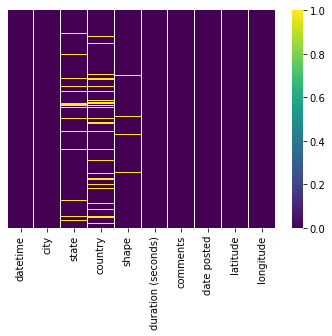

In [9]:
sns.heatmap(ufo_df.isnull(), yticklabels= False, cbar = True, cmap = 'viridis')

#sns.heatmap(<dataframe_df_name>.isnull(), yticklabels= False, cbar = True, cmap = 'viridis')

In [10]:
nullValues = ufo_df.isnull().sum()
nullPercent = (nullValues / len(ufo_df))*100
print(' Null Values (% of entries):')
print(round(nullPercent.sort_values(ascending=False),2))

 Null Values (% of entries):
country               11.84
state                  7.14
shape                  2.40
comments               0.02
longitude              0.00
latitude               0.00
date posted            0.00
duration (seconds)     0.00
city                   0.00
datetime               0.00
dtype: float64


In [11]:
ufo_df['datetime'] = ufo_df['datetime'].str.replace('24:00', '0:00') #converts 24:00 to 0:00
ufo_df['month'] = pd.DatetimeIndex(ufo_df['datetime']).month #creates column 'month' stripping the year from datetime_zero
ufo_df['year'] = pd.DatetimeIndex(ufo_df['datetime']).year #creates column 'year' stripping the year from datetime_zero
ufo_df['day'] = pd.DatetimeIndex(ufo_df['datetime']).day #creates column 'day' stripping the year from datetime_zero
ufo_df['hour'] = pd.DatetimeIndex(ufo_df['datetime']).hour #creates column 'hour' stripping the year from datetime_zero
ufo_df['datetime'] = pd.to_datetime(ufo_df['datetime'], errors='coerce')

In [12]:
ufo_df.head()

datetime                  city state  ...  year day hour
0 1949-10-10 20:30:00            san marcos    tx  ...  1949  10   20
1 1949-10-10 21:00:00          lackland afb    tx  ...  1949  10   21
2 1955-10-10 17:00:00  chester (uk/england)   NaN  ...  1955  10   17
3 1956-10-10 21:00:00                  edna    tx  ...  1956  10   21
4 1960-10-10 20:00:00               kaneohe    hi  ...  1960  10   20

[5 rows x 14 columns]

In [13]:
ufo_df.shape

(79973, 14)

## Code for Session No 53 

> Let's see how UFO reportings have changed in the last 70 years

In [14]:
type(ufo_df)

pandas.core.frame.DataFrame

In [15]:
years_data = ufo_df['year'].value_counts()
years_index = years_data.index  
years_values = years_data.values

In [16]:
years_data

2012    7336
2013    7018
2011    5090
2008    4798
2009    4522
        ... 
1929       1
1930       1
1934       1
1941       1
1920       1
Name: year, Length: 86, dtype: int64

In [17]:
type(years_data)

pandas.core.series.Series

In [18]:
years_data.get(2000)

2758

# we see a large increase of sightings at the beginning of the 90's
# I indicated the start of the X-Files TV show for reference 1985

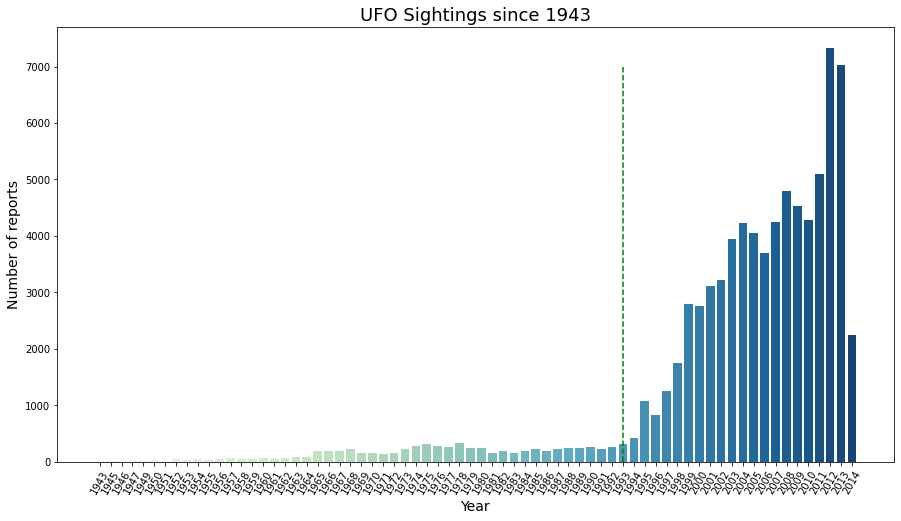

In [19]:
plt.figure(figsize=(15,8))
plt.xticks(rotation = 60)
plt.title('UFO Sightings since 1943', fontsize=18)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of reports", fontsize=14)
years_plot = sns.barplot(x=years_index[:70],y=years_values[:70], palette = "GnBu")

plt.vlines(48, 0, 7000, linestyles ="dashed", colors ="g") 
plt.show()

In [20]:
def month_conversion(m):
    if m in range(3,6):
        return "Spring"
    if m in range(6,9):
        return "Summer"
    if m in range(9,12):
        return "Autumn"
    if m == 12 or m == 1 or m == 2:
        return "Winter"
    
season_order = ["Spring", "Summer", "Autumn", "Winter"]

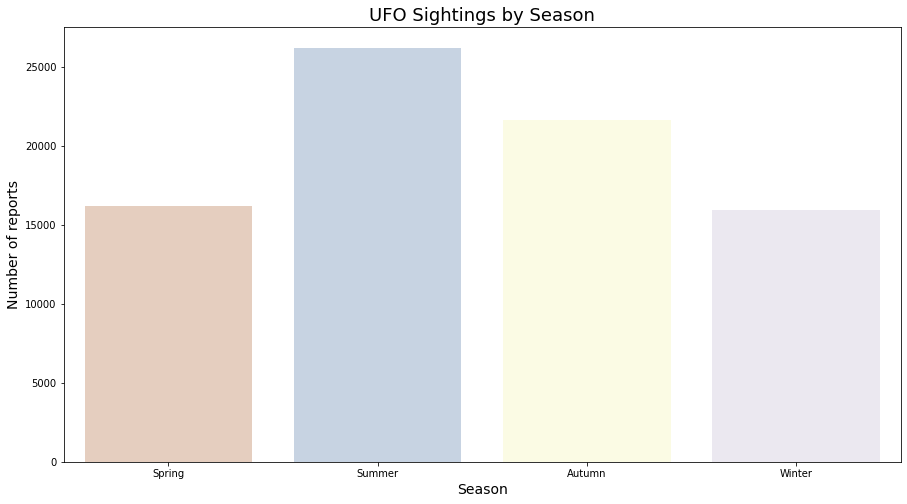

In [21]:
ufo_df["Season"] = ufo_df['month'].apply(month_conversion)
season_stat = ufo_df["Season"].value_counts()
season_index = season_stat.index
season_value = season_stat.values
plt.figure(figsize=(15,8))
plt.title('UFO Sightings by Season', fontsize=18)
plt.xlabel("Season",fontsize=14)
plt.ylabel("Number of reports", fontsize=14)
season_plot = sns.barplot(x=season_index[:60],y=season_value[:60], palette = "Accent_r", alpha=0.3, order=season_order)

### Code for Session 54

> Execute Run Before Command till this cell

In [22]:
ufo_df['country'].value_counts()

us     64968
ca      2989
gb      1901
au       537
de       105
eng        1
Name: country, dtype: int64

In [23]:
colors = ["cornflowerblue", "lightcoral", "lightgreen", "gold", "black","yellow"]
labels =['United States', 'Canada', 'United Kingdom', 'Australia', 'Germany','England']

expl = (0.1,0.2,0.4,0.6,0.8,1.0)

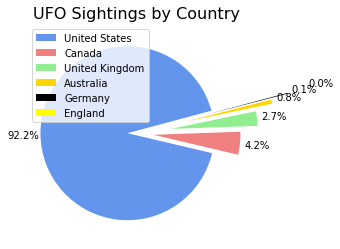

In [24]:
plt.pie(
        ufo_df['country'].value_counts(), 
        colors = colors,
        explode = expl,
        autopct='%.1f%%', 
        pctdistance=1.2,
        labels = None,
        labeldistance = 1.4,
        startangle = 15
        )

plt.legend(labels=labels, loc='upper left')
plt.title('UFO Sightings by Country', size=16)

plt.show() 

In [25]:
ufo = ufo_df.rename(columns={'longitude':'longitude'}) #correcting typo in the dataframe
ufo.at[43782,'latitude']= 33.2001  #correcting another typo
ufo["latitude"] = ufo.latitude.astype(float)  #setting latitude as a real number


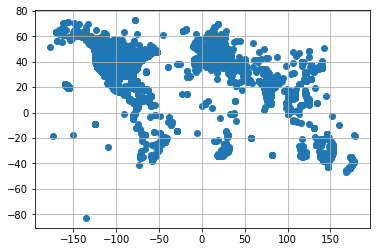

In [26]:
# check coordinates first
plt.scatter(ufo.longitude, ufo.latitude)
plt.grid()
plt.show()

> Import Folium Library

> This library will be used to create interactive maps

In [27]:
import folium
from folium.plugins import HeatMap

In [28]:
map = folium.Map(location=[48, -102], zoom_start=4,width='50%', height='60%')

map

In [29]:
### Interactive Map for each location from the year 2010.

In [30]:
df_plot_2010 = ufo[ufo.year==2010]
df_plot_2010.shape

df_plot_2010.head()

datetime          city state country  ...  year day hour  Season
212 2010-10-10 01:00:00  orchard park    ny      us  ...  2010  10    1  Autumn
213 2010-10-10 02:30:00    harrisburg    pa      us  ...  2010  10    2  Autumn
214 2010-10-10 03:00:00        euclid    oh      us  ...  2010  10    3  Autumn
215 2010-10-10 08:30:00         starr    sc      us  ...  2010  10    8  Autumn
216 2010-10-10 12:00:00     greenwich    ct      us  ...  2010  10   12  Autumn

[5 rows x 15 columns]

In [31]:
# interactive map of individual locations
zoom_factor = 3
my_map_2 = folium.Map(location=[36,-120], zoom_start=zoom_factor, width='50%', height='60%')

for i in range(0,df_plot_2010.shape[0]):
   folium.Circle(
      location=[df_plot_2010.iloc[i]['latitude'], df_plot_2010.iloc[i]['longitude']],
      radius=10000,
      color='red',
      fill_color='red',
      popup = str.upper(df_plot_2010.iloc[i]['city'])
   ).add_to(my_map_2)
my_map_2 # display